<a href="https://www.kaggle.com/code/daiqing2009/job-description-extraction-comparison?scriptVersionId=230232125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# just in case pip will pompt for upgrade
!pip install  --quiet --upgrade pip
# !pip uninstall -y ipywidgets
# %pip install --quiet "ipywidgets>=7,<8"
# %pip install ipywidgets
!jupyter --version

Selected Jupyter core packages...
IPython          : 9.0.2
ipykernel        : 6.29.5
ipywidgets       : 7.8.5
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.15.0
jupyterlab       : 4.3.5
nbclient         : 0.10.2
nbconvert        : 7.16.6
nbformat         : 5.10.4
notebook         : 7.3.2
qtconsole        : not installed
traitlets        : 5.14.3


In [2]:
# download data to local

import os

def detect_environment():
    """Detects the environment: Kaggle, Google Colab, or Local."""
    if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
        return "Kaggle"
    elif "COLAB_GPU" in os.environ:
        return "Google Colab"
    else:
        return "Local"

def create_folder_if_not_exists(path):
    """Creates a folder if it does not already exist."""
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Folder created at: {path}")
    else:
        print(f"Folder already exists at: {path}")

def setup_kaggle_credentials():
    """Ensures Kaggle API credentials are available."""
    if detect_environment() == "Google Colab":
      from google.colab import userdata
      os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
      os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
    elif detect_environment() == "Local":
      kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
      if not os.path.exists(kaggle_json_path):
        # Prompt user to upload `kaggle.json`
        print("Please upload your `kaggle.json` file.")
        from google.colab import files
        uploaded = files.upload()
        with open(kaggle_json_path, "wb") as f:
            f.write(uploaded['kaggle.json'])
      os.chmod(kaggle_json_path, 0o600)  # Set correct permissions for the file

def download_kaggle_resource(input_path, resource_name):
    """
    Downloads a dataset or notebook output from Kaggle using the resource name.
    Automatically unzips if needed and logs useful diagnostic information.
    """
    from kaggle.api.kaggle_api_extended import KaggleApi
    import os

    setup_kaggle_credentials()

    # Initialize Kaggle API
    api = KaggleApi()
    api.authenticate()

    try:
        # Attempt to download as a dataset
        print(f"Attempting to download dataset: {resource_name}")
        api.dataset_download_files(resource_name, path=input_path, unzip=True)
        print(f"Dataset downloaded and extracted to {input_path}")
    except Exception as dataset_error:
        print(f"Dataset not found or inaccessible: {dataset_error}. Attempting as notebook output.")
        try:
            # Attempt to download as notebook output
            print(f"Attempting to download notebook output: {resource_name}")
            api.kernel_output(resource_name, path=input_path, unzip=True)
            print(f"Notebook output downloaded and extracted to {input_path}")
        except Exception as notebook_error:
            print(f"Failed to download resource: {resource_name}.")
            print(f"Dataset error: {dataset_error}")
            print(f"Notebook output error: {notebook_error}")
            print("Please verify the resource name, access permissions, and your Kaggle API credentials.")

In [3]:
!pip install --quiet kaggle
resource_name = "arshkon/linkedin-job-postings"

In [ ]:
# Step 1: Detect environment
environment = detect_environment()
print(f"Environment detected: {environment}")

# Step 2: Create input folder
if environment == "Kaggle":
    input_path = "/kaggle/input"
elif environment == "Google Colab":
    input_path = "/content/input"
elif environment == "Local":
    input_path = "./input"
else:
    raise ValueError("Unknown environment detected!")

create_folder_if_not_exists(input_path)
print(f"Input folder path: {input_path}")

# Step 3: Create output folder
if environment == "Kaggle":
    output_path = "/kaggle/working/output"
elif environment == "Google Colab":
    output_path = "/content/output"
elif environment == "Local":
    output_path = "./output"
else:
    raise ValueError("Unknown environment detected!")

create_folder_if_not_exists(output_path)
print(f"Output folder path: {output_path}")

# Step 4: Download dataset or notebook output
if environment != "Kaggle":
    pass
    # resource_name = input("Enter the Kaggle dataset name or notebook name to download: ")
    download_kaggle_resource(input_path, resource_name)

# initialize the data prefix
if environment == "Kaggle":
    dataprefix = input_path + "/" + resource_name.split("/")[1]
elif environment == "Google Colab":
    dataprefix = input_path
elif environment == "Local":
    dataprefix = input_path
# mount cloud drive if necessary
if environment == "Google Colab":
  from google.colab import drive
  drive.mount('/content/drive')

Environment detected: Local
Folder already exists at: ./input
Input folder path: ./input
Folder already exists at: ./output
Output folder path: ./output
Attempting to download dataset: arshkon/linkedin-job-postings
Dataset URL: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings
Dataset downloaded and extracted to ./input


In [5]:
!pip install --quiet pandas

In [7]:
import pandas as pd
# Load the Job Postings CSV file into a Pandas DataFrame
postings_df = pd.read_csv(f"{dataprefix}/postings.csv")
# Print number of rows and columns
print('jd shape=',postings_df.shape)

# Display the first few rows of the dataset to understand its structure
postings_df.head()

jd shape= (123849, 31)


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [7]:
# Load the Job Postings CSV file into a Pandas DataFrame
jimap_df = pd.read_csv(f"{dataprefix}/jobs/job_industries.csv")
ins_df = pd.read_csv(f"{dataprefix}/mappings/industries.csv")

# print(ins_df['industry_name'].tolist())

# print the industries related to IT/software derived from chat gpt
IT_IND_KEYWORDS = [
    "Software",
    "IT Services",
    "IT System",
    "Computer",
    "Data Security Software Products",
    "Blockchain",
    "Internet",
    "Social Networking",
    "Business Intelligence",
    "E-Learning",
]
IT_IND_STOPWORDS = [
    "Publishing",
    "News",
    "Hardware",
    "Equipment"
]
# print('|'.join(IT_IND_KEYWORDS))
ins_include = ins_df['industry_name'].str.contains('|'.join(IT_IND_KEYWORDS), na=False)
ins_exlcude = ins_df['industry_name'].str.contains('|'.join(IT_IND_STOPWORDS),na=False )

ins_it = ins_df[ins_include]
ins_it = ins_it[~ins_exlcude]

print(ins_it)

     industry_id                            industry_name
2              4                     Software Development
3              5             Computer Networking Products
4              6     Technology, Information and Internet
22            24  Computers and Electronics Manufacturing
93            96            IT Services and IT Consulting
106          109                           Computer Games
115          118            Computer and Network Security
129          132                     E-Learning Providers
226         1285           Internet Marketplace Platforms
268         1855                IT System Design Services
342         3101      Desktop Computing Software Products
343         3102    IT System Custom Software Development
344         3103     IT System Operations and Maintenance
345         3104      IT System Installation and Disposal
346         3105           IT System Training and Support
347         3106                  IT System Data Services
348         31

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_17465/23122396.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ins_it = ins_it[~ins_exlcude]


In [8]:
df_itpos = pd.merge(pd.merge(ins_it,jimap_df,on='industry_id'), postings_df, on='job_id')
print(df_itpos.shape)
df_itpos.head()

(18675, 33)


,industry_id,industry_name,job_id,company_name,title,description,max_salary,pay_period,location,company_id,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,4,Software Development,3884916106,"Direct Sales Recruiting, LLC",Sales Manager - Public Relations & Investor Re...,Sales Manager - Public Relations & Investor Re...,NaN,NaN,New York City Metropolitan Area,766849.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
1,4,Software Development,3884915161,"Direct Sales Recruiting, LLC",Business Development Rep - Digital Media - Chi...,Business Development Rep - Digital Media \nOur...,80000.0,YEARLY,Greater Chicago Area,766849.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,65000.0,NaN,NaN
2,4,Software Development,3887466954,hackajob,Cloud Engineer,hackajob transforms your job search into a per...,160000.0,YEARLY,"Suitland, MD",5396873.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,135000.0,20746.0,24033.0
3,4,Software Development,3884432470,Renewed Vision,Windows Software Engineer,The Renewed Vision Windows Software Engineer w...,NaN,NaN,United States,8913985.0,...,NaN,1.712346e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
4,4,Software Development,3884429682,Diverse Lynx,Cyber security /Report Developer ( W2 Role),Role: Security Analyst/Report Developer (exper...,NaN,NaN,United States,90396.0,...,NaN,1.712347e+12,NaN,0,CONTRACT,NaN,NaN,NaN,NaN,NaN


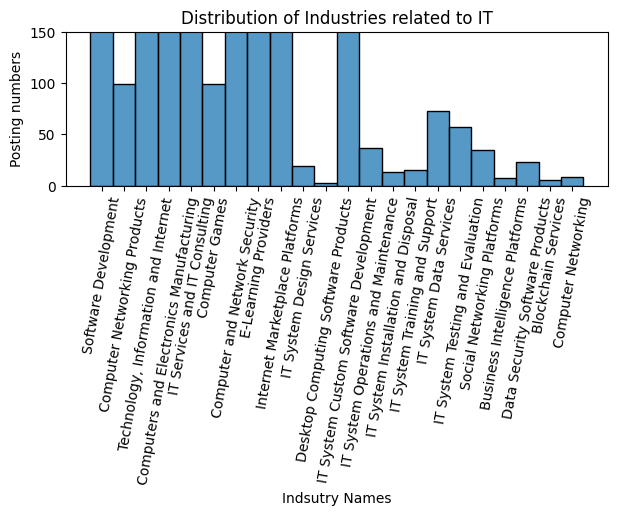

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
def forward(x):
    # return x**(1/2)
    # print(x)
    # print(numpy.log(x))
    return numpy.log(x+1) # add 1 to avoid divide by zero error

def inverse(x):
    # return x**2
    return numpy.exp(x)

fig, ax = plt.subplots(figsize=(7,2))
sns.histplot(data=df_itpos, x='industry_name')
# ax.set_yscale('function', functions=(forward, inverse))
ax.set_ylim([0, 150])

plt.title('Distribution of Industries related to IT')
plt.xlabel('Indsutry Names')
plt.xticks(rotation = 80)
plt.ylabel('Posting numbers')
plt.show()

In [10]:
# print non-empty skills desc
skill_set = df_itpos[pd.isna(df_itpos['skills_desc'])==False]['skills_desc']
print(skill_set)
#TODO: strip out skill sets

894      \n\nMust Have: Minimum Requirements  Requires ...
938                                            PI239440414
950      \n\nMust Have: Minimum Requirements \n\nTo be ...
2647                                       Financenetsuite
2877                    Sales enablementchannel enablement
                               ...                        
16443    Sap Solution Manager,Sap Master Data,Sap Syste...
16449       Healthcare,Project Management,Project Delivery
16451                                   HRP,SHAREPOINT,SDS
16452                          Sap Fico,Sap S4 Hana,Sap Bw
17934    CRMEdTechOutreachSFDCSaaS EdTechSales experien...
Name: skills_desc, Length: 261, dtype: object


In [11]:
# stratified sample of IT positions in each industry
# postings_sample_df = df_itpos.sample(1000)
postings_sample_df = df_itpos.groupby('industry_id', group_keys=False)\
    .apply(lambda x: x.sample(min(len(x), 10)))

# list the columns of data
print(postings_sample_df.shape)
# check completeness of each column 
print(postings_sample_df.count())

(203, 33)
industry_id                   203
industry_name                 203
job_id                        203
company_name                  202
title                         203
description                   203
max_salary                     57
pay_period                     67
location                      203
company_id                    202
views                         201
med_salary                     10
min_salary                     57
formatted_work_type           203
applies                        84
original_listed_time          203
remote_allowed                 87
job_posting_url               203
application_url                96
application_type              203
expiry                        203
closed_time                     0
formatted_experience_level    152
skills_desc                     1
listed_time                   203
posting_domain                 68
sponsored                     203
work_type                     203
currency                       67
comp

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_17465/1507453469.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), 10)))


In [12]:
postings_sample_df.head(10)

# save sampled data to output
postings_sample_df.to_csv(f"{output_path}/posting_sample.csv", index=False)

In [13]:
# Analyze the key elements from sample postings, such as responsibilities, qualifications
print("containing responsibilities:",str(postings_sample_df['description'].str.contains('responsibilities|responsibility').value_counts()[True]))
print("containing qualification:",postings_sample_df['description'].str.contains('qualification|qualifications').value_counts()[True])
print("containing company:",postings_sample_df['description'].str.contains('company').value_counts()[True])

containing responsibilities: 48
containing qualification: 25
containing company: 71


## Extract via LLM
The keywords statistics above indicate that rule-based information extraction is not feasible. We switch to the LLM solution.

In [14]:
EXT_SAMPLE_SIZE = 10
#EXT_SAMPLE_SIZE = len(postings_sample_df)

In [15]:
JOB_DETAILS_EXTRACTOR = """
<task>
Identify the key details from a job description and company overview to create a structured JSON output. Focus on extracting the most crucial and concise information that would be most relevant for tailoring a resume to this specific job.
</task>

<job_description>
{job_description}
</job_description>

Note: The "job_duties_and_responsibilities", and "required_qualifications" sections are particularly important for resume tailoring. Ensure these are as comprehensive and accurate as possible.

{format_instructions}
"""

In [16]:
!pip install --quiet --upgrade pydantic
!pip install --quiet langchain_core langchain_ollama
!pip install --quiet langchain_google_genai

In [17]:
from typing import List,Optional
from pydantic import BaseModel, Field

class JobDetails(BaseModel):
    job_title: str = Field(description="The specific role, its level, and scope within the organization.")
    # job_purpose: Optional[str] = Field(description="A high-level overview of the role and why it exists in the organization.")
    # keywords: Optional[List[str]] = Field(description="Key expertise, skills, and requirements the job demands.")
    job_responsibilities: List[str] = Field(description="Focus on essential functions, their frequency and importance, level of decision-making, areas of accountability, and any supervisory responsibilities.")
    required_qualifications: List[str] = Field(description="Including minimum experience, specific knowledge, skills, abilities, and any required licenses or certifications.")
    preferred_qualifications: Optional[List[str]] = Field(description="Additional \"nice-to-have\" qualifications that could set a candidate apart.")
    eduation: Optional[str] = Field(description="The minimum education level required for the role.")
    company_name: Optional[str] = Field(description="The name of the hiring organization.")
    company_details: Optional[str] = Field(description="Overview, mission, values, or way of working that could be relevant for tailoring a resume or cover letter.")

# compose the 
SEPERATOR = " \n "
postings_sample_df['jd_to_extract'] = "Job Title: " + postings_sample_df['title'] + SEPERATOR  \
                                + "Company Name: " + postings_sample_df['company_name'] + SEPERATOR \
                                + postings_sample_df['description']
postings_sample_df[['title','industry_name','company_name','jd_to_extract']][:10]

,title,industry_name,company_name,jd_to_extract
3684,Temporary Instructional Designer II,Software Development,Paylocity,Job Title: Temporary Instructional Designer II...
2923,Software Developer,Software Development,DataAnnotation,Job Title: Software Developer \n Company Name:...
1394,Lead Product Designer,Software Development,LogicGate,Job Title: Lead Product Designer \n Company Na...
3323,QuickBooks Live Expert,Software Development,Intuit,Job Title: QuickBooks Live Expert \n Company N...
3642,New Role! - $5M in Seed Funding! - Business De...,Software Development,ScoutLab.io,Job Title: New Role! - $5M in Seed Funding! - ...
1326,Principal Product Marketing Manager,Software Development,Mural,Job Title: Principal Product Marketing Manager...
3383,Sr. Client Manager,Software Development,OpenText,Job Title: Sr. Client Manager \n Company Name:...
1790,EHS Specialist,Software Development,Amazon,Job Title: EHS Specialist \n Company Name: Ama...
2088,"Principal Engineer, Frontend/Fullstack, Web",Software Development,Square,"Job Title: Principal Engineer, Frontend/Fullst..."
3011,Accounts Receivable Specialist,Software Development,GoEngineer,Job Title: Accounts Receivable Specialist \n C...


In [18]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.rate_limiters import InMemoryRateLimiter
import getpass
import time

rate_limiter = InMemoryRateLimiter(
    requests_per_second=10,  
    check_every_n_seconds=0.2,  # Wake up every 100 ms to check whether allowed to make a request,
    max_bucket_size=10,  # Controls the maximum burst size.
)

# os.environ["GOOGLE_API_KEY"] = user_secrets.get_secret("GEMINI API KEY")
# print(os.environ["GOOGLE_API_KEY"])
if "GOOGLE_API_KEY" not in os.environ:
    if environment == 'kaggle':
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        os.environ["GOOGLE_API_KEY"] = user_secrets.get_secret("GEMINI API KEY")
    else:
        os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")
    
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    rate_limiter=rate_limiter  
)

json_parser = JsonOutputParser(pydantic_object=JobDetails)

prompt_template = PromptTemplate(
    template=JOB_DETAILS_EXTRACTOR,
    input_variables=["job_description"],
    partial_variables={"format_instructions": json_parser.get_format_instructions()}
    )

responses = []
job_descptions_idx = []
for i in range(EXT_SAMPLE_SIZE):
    prompt = prompt_template.format(job_description=postings_sample_df.iloc[i]['jd_to_extract'])
    structured_llm = llm.with_structured_output(JobDetails)
    try: 
        response = structured_llm.invoke(prompt)
        if response:
            # make sure only valid response is appended
            responses.append(response)
            job_descptions_idx.append(i)
        # print(response)
    except:
        print(f'Exception happened for on item: {i}')
        
    # time.sleep(5) # gemini has quota limitation for at most 2 requests per second

In [5]:
FILENAME_JOB_EXTRACTOR_BASELINE = "jd_ext_gemini.json"
FILENAME_JOB_DESCRIPTIONS_BASELINE = "jd_idx_gemini.json"
FILENAME_JOB_EXTRACTOR = "jd_ext_local.json"
FILENAME_JOB_DESCRIPTIONS = "jd_idx_local.json"
import json


In [20]:
output_ext = [json_parser.parse(response.json()) for response in responses]

# save responses to json
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR_BASELINE}", "w") as f:
    json.dump(output_ext, f, indent=2)
    f.close()

# save job descriptions to json
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS_BASELINE}", "w") as f:
    json.dump(job_descptions_idx, f, indent=2)
    f.close()

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_17465/25097016.py:1: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  output_ext = [json_parser.parse(response.json()) for response in responses]


In [21]:
LOCAL_MODEL = "llama3.1"

In [22]:
!ollama --version
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread
#Download model
!ollama pull llama3.1
!pip install ollama
!ollama list

ollama version is 0.6.2
ERROR: This script is intended to run on Linux only.


Error: listen tcp 127.0.0.1:11434: bind: address already in use


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest 
pulling 667b0c1932bc... 100% ▕████████████████▏ 4.9 GB                         
pulling 948af2743fc7... 100% ▕████████████████▏ 1.5 KB                         
pulling 0ba8f0e314b4... 100% ▕████████████████▏  12 KB                         
pulling 56bb8bd477a5... 100% ▕████████████████▏   96 B                         
pulling 455f34728c9b... 100% ▕████████████████▏  487 B                         
verifying sha256 digest 
writing manifest 
success 
NAME               ID              SIZE      MODIFIED     
llama3.1:latest    46e0c10c039e    4.9 GB    1 second ago    
deepseek-r1:8b     28f8fd6cdc67    4.9 GB    2 months ago    
gemma2:latest      ff02c3702f32    5.4 GB    2 months ago    
llama3.2:latest    a80c4f17acd5    2.0 GB    4 months ago    


In [23]:
from langchain_core.prompts import PromptTemplate
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import JsonOutputParser

llm = ChatOllama(
    model=LOCAL_MODEL,
    # model="gemma2",
    temperature=0,  # Set the temperature to 0 for more deterministic output
    num_ctx=4096
    # other params...
)

#TODO: check 
json_parser = JsonOutputParser(pydantic_object=JobDetails)

prompt_template = PromptTemplate(
    template=JOB_DETAILS_EXTRACTOR,
    input_variables=["job_description"],
    partial_variables={"format_instructions": json_parser.get_format_instructions()}
    )

responses = []
job_descptions_idx = []
for i in range(EXT_SAMPLE_SIZE):
    prompt = prompt_template.format(job_description=postings_sample_df.iloc[i]['description'])
    structured_llm = llm.with_structured_output(JobDetails)
    try:
        response = structured_llm.invoke(prompt)
        if response:
            # make sure only valid response is appended
            responses.append(response)
            job_descptions_idx.append(i)
        # print(response)
    except:
        print(f'error occured in {i}')

error occured in 5


In [24]:
output_ext = [json_parser.parse(response.json()) for response in responses]

# save responses to json
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR}", "w") as f:
    json.dump(output_ext, f, indent=2)
    f.close()

# save job descriptions to json
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS}", "w") as f:
    json.dump(job_descptions_idx, f, indent=2)
    f.close()

/var/folders/bj/spr6xdy950jf8sj2svjhs0vh0000gn/T/ipykernel_17465/3422824514.py:1: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  output_ext = [json_parser.parse(response.json()) for response in responses]


### post-process the converted data 


In [25]:
def post_process(filename):
    # load job details from json
    with open(f"{output_path}/{filename}", "r") as f:
        job_extracted = json.load(f)
        f.close()
    # convert json to dataframe for post processing
    df = pd.json_normalize(job_extracted)
    # check non value columns
    none_indicator = ['nan','Not specified','None', 'Unspecified','N/A']

    # clean single-value columns
    none_num = df['eduation'].isin(none_indicator).sum()
    print(f'the column eduation to be nullified: {none_num}')
    df['eduation'] = df['eduation'].replace(none_indicator, None)

    none_num = df['company_details'].isin(none_indicator).sum()
    print(f'the column company_details to be nullified: {none_num}')
    df['company_details'] = df['company_details'].replace(none_indicator, None)
    # print(df['eduation'].isin(none_indicator).sum())
    # print(df['eduation'].unique()) check if there's missing number

    # clean multi-value columns
    df['job_responsibilities'] = df['job_responsibilities'].apply(lambda x: [] if len(x) ==1 and x[0] in none_indicator else x)
    print(df[df['job_responsibilities'].apply(lambda x: len(x))<1]['job_responsibilities'])

    df['required_qualifications'] = df['required_qualifications'].apply(lambda x: [] if len(x) ==1 and x[0] in none_indicator else x)
    print(df[df['required_qualifications'].apply(lambda x: len(x))<1]['required_qualifications'])

    none_num = df['preferred_qualifications'].isna().sum()
    print(f'the column preferred_qualifications to be nullified: {none_num}')
    df['preferred_qualifications'] = df['preferred_qualifications'].apply(lambda x: [] if x is None else x)
    df['preferred_qualifications'] = df['preferred_qualifications'].apply(lambda x: [] if len(x) ==1 and x[0] in none_indicator else x)
    print(df[df['preferred_qualifications'].apply(lambda x: len(x))<1]['preferred_qualifications'])

    # export to json
    df.to_json(f"{output_path}/{filename}", orient='records')

post_process(FILENAME_JOB_EXTRACTOR)
post_process(FILENAME_JOB_EXTRACTOR_BASELINE)

# df.to_json(f"{output_path}/job_extracted_baseline_postprocessed.json", orient='records')

the column eduation to be nullified: 0
the column company_details to be nullified: 0
Series([], Name: job_responsibilities, dtype: object)
Series([], Name: required_qualifications, dtype: object)
the column preferred_qualifications to be nullified: 2
1    []
7    []
Name: preferred_qualifications, dtype: object
the column eduation to be nullified: 0
the column company_details to be nullified: 0
Series([], Name: job_responsibilities, dtype: object)
Series([], Name: required_qualifications, dtype: object)
the column preferred_qualifications to be nullified: 0
1    []
5    []
8    []
Name: preferred_qualifications, dtype: object


## Local Model Evaluation
* Whether the extraction(esp: skills) contains enough information from the original text 
  * leveraging existing skill extraction model to extract the baseline info 
  * compare the data with the baseline extraction section by section
* Whether the extraction contains any contradictions or hallucinations from the original text.
  * use rouge score, which was used for evaluation of content conformation of text summarizaion as reference

In [15]:
# load job details from json
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR_BASELINE}", "r") as f:
    job_extracted_baseline = json.load(f)
    f.close()
    
with open(f"{output_path}/{FILENAME_JOB_EXTRACTOR}", "r") as f:
    job_extracted = json.load(f)
    f.close()

# load job descriptions from txt
# jd_ext_idx_baseline = []
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS_BASELINE}", "r") as f:
    jd_ext_idx_baseline = json.load(f)
    f.close()
    
# jd_ext_idx = []
with open(f"{output_path}/{FILENAME_JOB_DESCRIPTIONS}", "r") as f:
    jd_ext_idx = json.load(f)
    f.close()

# load sample postings
postings_sample_df = pd.read_csv(f"{output_path}/posting_sample.csv")

In [16]:
!pip install --quiet rouge-score
!pip install --quiet seaborn
from rouge_score import rouge_scorer
import seaborn as sns
import matplotlib.pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [17]:
SECTIONS = ["job_responsibilities", "required_qualifications", "preferred_qualifications"]

# concatenate section by secion for each extraction
def concat_by_section(extracted_job, section_name):
    return ' '.join(extracted_job[section_name]) if extracted_job[section_name] else None

      metric                   section  precision
1817  rougeL  preferred_qualifications        NaN
1818  rougeL  preferred_qualifications   0.857143
1819  rougeL  preferred_qualifications        NaN
1820  rougeL  preferred_qualifications        NaN
1821  rougeL  preferred_qualifications   1.000000
1822  rougeL  preferred_qualifications   0.764706
1823  rougeL  preferred_qualifications   0.888889
1824  rougeL  preferred_qualifications   0.857143
1825  rougeL  preferred_qualifications   1.000000
1826  rougeL  preferred_qualifications        NaN


<Axes: xlabel='section', ylabel='precision'>

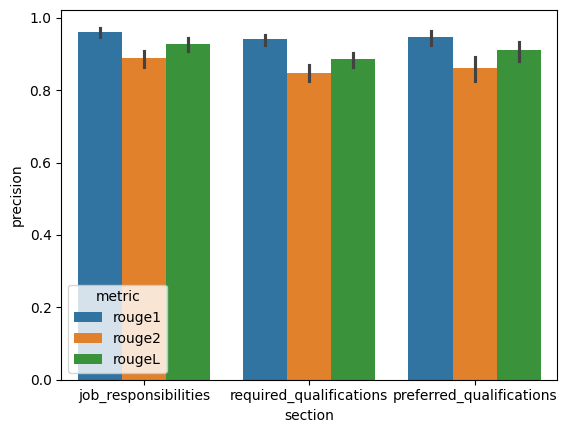

In [18]:
rs_score = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# print(' '.join(job_extracted[0]['job_responsibilities']))
# print(type(postings_sample_df.iloc[jd_ext_idx[0]]['description']))
# print(rs_score.score(postings_sample_df.iloc[jd_ext_idx[0]]['description'], ' '.join(job_extracted[0]['job_responsibilities'])))

r1_scores = {}
r2_scores = {}
rL_scores = {}

for i in range(len(jd_ext_idx)):
    original_desc = postings_sample_df.iloc[jd_ext_idx[i]]['description']
    for section in SECTIONS:
        content = concat_by_section(job_extracted[i], section)
        # content = job_extracted[i][section]
        if content:
            if section not in r1_scores:
                r1_scores[section] = {}
                r2_scores[section] = {}
                rL_scores[section] = {}
            score = rs_score.score(original_desc, content)
            r1_scores[section][i] = score['rouge1'].precision
            r2_scores[section][i] = score['rouge2'].precision
            rL_scores[section][i] = score['rougeL'].precision

# Visualize the rouge1 and rougeL by section in a grouped bar plot
r1_df =  pd.DataFrame(r1_scores)
r1_df['metric'] = 'rouge1'
r2_df =  pd.DataFrame(r2_scores)
r2_df['metric'] = 'rouge2'
rL_df =  pd.DataFrame(rL_scores)
rL_df['metric'] = 'rougeL'

score_df = pd.concat([r1_df, r2_df, rL_df])
score_df = score_df.melt(id_vars=['metric'], var_name='section', value_name='precision')
print(score_df.tail(10))

sns.barplot(data= score_df , x='section', y='precision',hue='metric')

In [30]:
!pip install --quiet sentence_transformers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 142, 143, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 200, 201, 202]
140
140
Error processing section: preferred_qualifications with content: ['Experience in B2B marketing Experience executing global SEM campaigns Familiarity with conversion tracking and tag management Familiarity with other paid media digital channels (e.g. video, display, social media, etc.) Passion for change, Snapchat, and creativity!', 'Proficient in troubleshooting, QA 

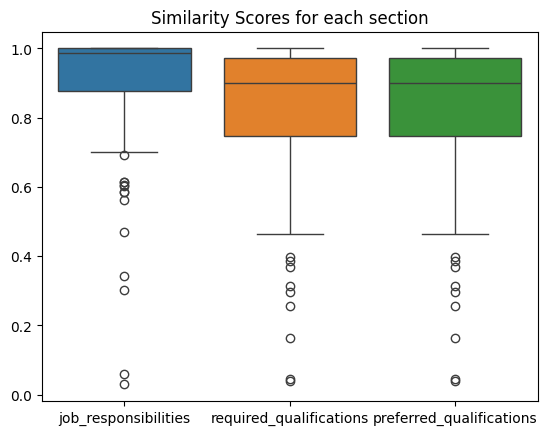

In [23]:
from sentence_transformers import SentenceTransformer
import torch

idx_common = list(set(jd_ext_idx)&set(jd_ext_idx_baseline))
print(idx_common)
# filter out the extration not common
common_job_extracted = [ext for idx,ext in enumerate(job_extracted) if jd_ext_idx[idx] in jd_ext_idx_baseline]
common_job_extracted_baseline = [ext for idx,ext in enumerate(job_extracted_baseline) if jd_ext_idx_baseline[idx] in jd_ext_idx]
print(len(common_job_extracted))
print(len(common_job_extracted_baseline))

#TODO: show job descriptions failed to be extracted 

# Download from the 🤗 Hub
embedder = SentenceTransformer("jensjorisdecorte/JobBERT-v2")

similarity_scores = {}
for section in SECTIONS:
    try:
        content = [concat_by_section(common_job_extracted[i], section) for i in range(len(idx_common))]
        local_embeddings = embedder.encode(content)
        baseline = [concat_by_section(common_job_extracted_baseline[i], section) for i in range(len(idx_common))]
        baseline_embeddings = embedder.encode(baseline)
    except:
        print(f"Error processing section: {section} with content: {content} and baseline: {baseline}") 
        print(f"content length: {len(content)} and baseline length: {len(baseline)}")
    # print(local_embeddings.shape) 
    # print(baseline_embeddings.shape)   
    # Calculate cosine similarity between the local and baseline embeddings
    similarity_scores[section] = torch.diagonal(embedder.similarity(local_embeddings, baseline_embeddings),0)

    # print(f"Average Cosine Similarity for {section}: {sum(similarity_scores) / len(similarity_scores)}")   
print(similarity_scores)
# Visualize the similarity scores in a box plot
df_sim = pd.DataFrame(similarity_scores)
# print(df_sim)
sns.boxplot(data=df_sim)
plt.title(f"Similarity Scores for each section")
plt.show()

### Outlier Analysis


In [29]:
# show the outlieers in job_responsibilities
outliers = similarity_scores['job_responsibilities'] < 0.6
# print(type(outliers))
# print(outliers.count(True))
# job_extracted_outliers ={}
# job_extracted_baseline_outliers = {}
job_extracted_outliers = [common_job_extracted[i] for i in range(len(idx_common)) if outliers[i]]
job_extracted_baseline_outliers = [common_job_extracted_baseline[i] for i in range(len(idx_common)) if outliers[i]]

# print(job_extracted_outliers['job_responsibilities'][1])
# print(job_extracted_baseline_outliers['job_responsibilities'][1])
scores = {}
outlier_similarities = []
# calculate itemized extraction
for i in range(len(job_extracted_outliers)):
    try:
        # print(i)
        ext_outliers = job_extracted_outliers[i]['job_responsibilities']
        # print(ext_outliers)
        local_embeddings = embedder.encode(ext_outliers)

        baselines = job_extracted_baseline_outliers[i]['job_responsibilities']
        # print(baselines)
        baseline_embeddings = embedder.encode(baselines)
        outlier_similarity = embedder.similarity(local_embeddings, baseline_embeddings)
        # print(outlier_similarity)
        outlier_similarities.append(outlier_similarity)
    except:
        print(f"Error processing section: {section} with content: {content} and baseline: {baseline}") 
        print(f"content length: {len(content)} and baseline length: {len(baseline)}")
print(outlier_similarities)

Error processing section: preferred_qualifications with content: ['Experience in B2B marketing Experience executing global SEM campaigns Familiarity with conversion tracking and tag management Familiarity with other paid media digital channels (e.g. video, display, social media, etc.) Passion for change, Snapchat, and creativity!', 'Proficient in troubleshooting, QA process, quality management tools, and test methodologies Experience in testing mobile is a plus Bachelors degree in Computer Science, IT or equivalent work or educational experience required Experience writing automated tests in a Continuous Integration (CI) systems Experience in building comprehensive Test Strategies and work independently on complex projects Demonstrable experience in programmatically testing software products and automating those tests. Skilled in building robust, scale-able, and high-quality test automation solutions for functional and regression testing', None, 'Strong coding and debugging skills, and

In [30]:
import ipywidgets as widgets
# items = [widgets.Label(str(i)) for i in range(8)]
# box = widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3, 100px)"))

def setBackGround(gamma):
    return  f'<div style="background-color: rgb({gamma * 256}, 0, 0); ' \
            f'color: white; width: 100%; height: 100%; ' \
            f'display: flex; align-items: center; justify-content: center;">' \
            f'{gamma:.4f}</div>'


outlier_scores = similarity_scores['job_responsibilities'][outliers]
tab_nest = widgets.Tab()
# job_titles = ['An accordion','Copy of the accordion']
tab_children = []
tab_titles = []

for idx, ext in enumerate(job_extracted_outliers):
    # tab_nest.set_title(1, 'Copy of the accordion')
    ext_outliers = job_extracted_outliers[idx]['job_responsibilities']
    ext_baselines = job_extracted_baseline_outliers[idx]['job_responsibilities']
    
    accordChildren = []
    accordTitles = []
    #TODO: add original text
    # print(len(outliers))
    # print(outlier_similarities[idx].shape)
    for idy, ext in enumerate(ext_outliers):
        try:
            simByItem = outlier_similarities[idx][idy]
            left_box = widgets.VBox([widgets.Label(txt) for txt in ext_baselines])
            right_box = widgets.VBox([widgets.HTML(setBackGround(i.item())) for i in simByItem])

            accordChildren.append(widgets.HBox([left_box, right_box]))
            accordTitles.append(ext + f": {torch.max(simByItem).item():.4f}")
        except:
            print(f"Error processing section: {section} with content: {content} and baseline: {baseline}") 
            print(f"content length: {len(content)} and baseline length: {len(baseline)}")
    accordion = widgets.Accordion(children=accordChildren)
    for idy, title in enumerate(accordTitles):
        accordion.set_title(idy, f"Extracted Item{idy}: " + title)
    tab_children.append(accordion)
    print()
    tab_titles.append(f'Outlier({idx}): {outlier_scores[idx]:.4f}')
tab_nest.children = tab_children
for idx, title in enumerate(tab_titles):
    tab_nest.set_title(idx, title)
tab_nest







Error processing section: preferred_qualifications with content: ['Experience in B2B marketing Experience executing global SEM campaigns Familiarity with conversion tracking and tag management Familiarity with other paid media digital channels (e.g. video, display, social media, etc.) Passion for change, Snapchat, and creativity!', 'Proficient in troubleshooting, QA process, quality management tools, and test methodologies Experience in testing mobile is a plus Bachelors degree in Computer Science, IT or equivalent work or educational experience required Experience writing automated tests in a Continuous Integration (CI) systems Experience in building comprehensive Test Strategies and work independently on complex projects Demonstrable experience in programmatically testing software products and automating those tests. Skilled in building robust, scale-able, and high-quality test automation solutions for functional and regression testing', None, 'Strong coding and debugging skill